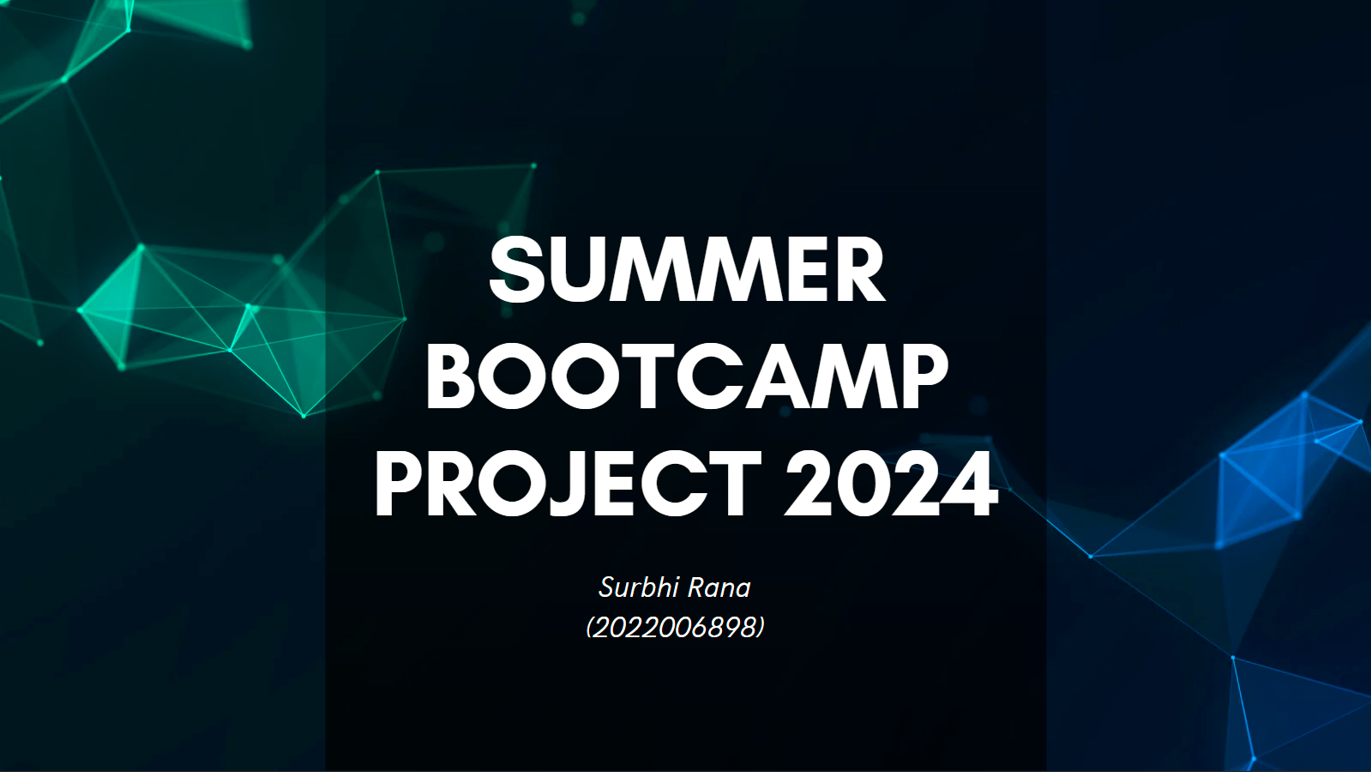

# List of Table
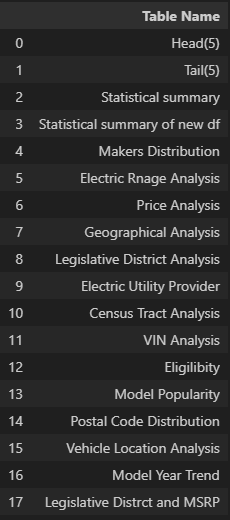

# List of Figure
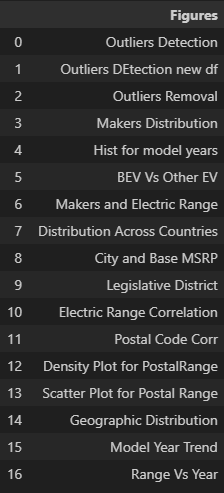

# Problem statement/ Objective


##### The primary objective of this analysis is to leverage historical EV registration data to understand the current market penetration of EVs, predict future market growth, and identify key trends and factors driving market expansion. 

## Data
The provided dataset contains the following columns, each representing different aspects of the electric vehicle (EV) population in the United States
### Data description
*	VIN (1-10): Partial Vehicle Identification Number.
*	County: The county in which the vehicle is registered.
*	City: The city in which the vehicle is registered.
*	State: The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.
*	Postal Code: The postal code where the vehicle is registered.
*	Model Year: The year of the vehicle model 
*	Make: The manufacturer of the vehicle.
*	Model: The model of the vehicle.
*	Electric Vehicle Type: The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).
*	Clean Alternative Fuel Vehicle (CAFV) Eligibility: Eligibility status for clean alternative fuel vehicle programs.
*	Electric Range: The maximum range of the vehicle on a single charge (in miles).
*	Base MSRP: The Manufacturer’s Suggested Retail Price.
*	Legislative District: The legislative district where the vehicle is registered.
*	DOL Vehicle ID: Department of Licensing Vehicle Identification.
*	Vehicle Location: Geographic coordinates of the vehicle location.
*	Electric Utility: The electric utility service provider for the vehicle’s location.
	2020 Census Tract: The census tract for the vehicle’s location.


## Basic Steps:
* 1-	Display the top 5 rows.
* 2-	Display the last 5 rows
* 3-	Check the shape of dataset.
* 4-	Check the datatypes of each feature.
* 5-	Check the Statistical summary 
* 6-	Check the null values
* 7-	Check the duplicate values
* 8-	Check the anomalies or wrong entries.
* 9-	Check the outliers and their authenticity.
* 10-	Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [5]:
df = pd.read_csv("C:\\Users\\hd c\\Desktop\\prac\\6-Electric_Vehicle_Population_Data New.csv")

C:\Users\hd c\AppData\Local\Temp\ipykernel_16132\1142261020.py:1: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\hd c\\Desktop\\prac\\6-Electric_Vehicle_Population_Data New.csv")


### 1- Display the top 5 rows.

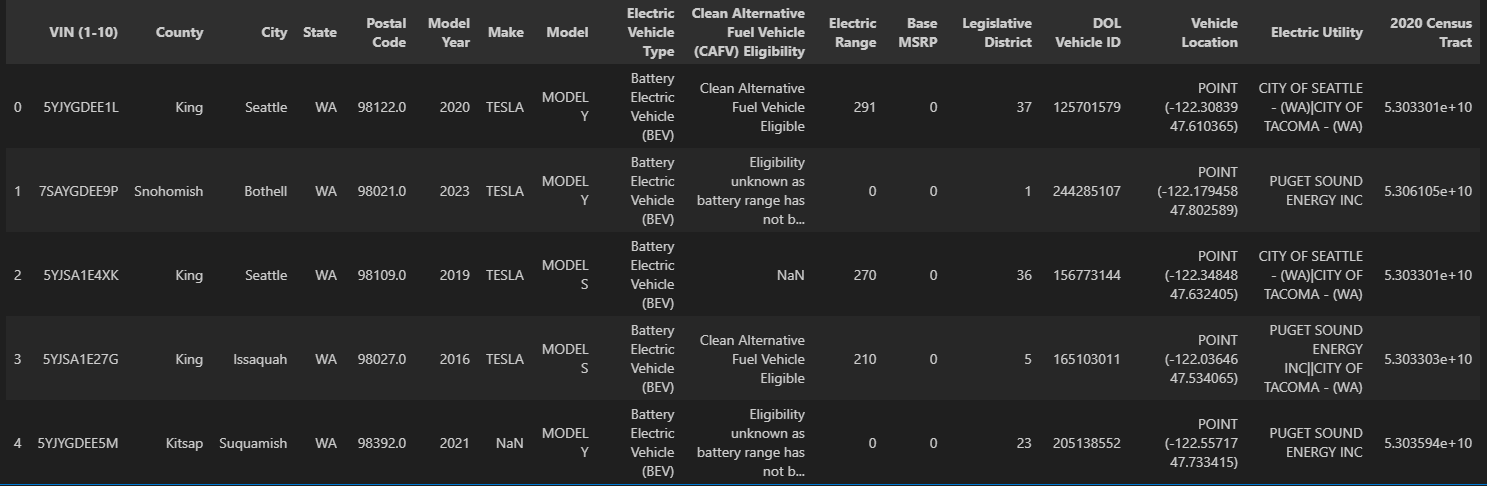

## Observation:
*	Base MSRP: The Manufacturer’s Suggested Retail Price can not be 0
*	Electric Range: The maximum range of the vehicle on a single charge (in miles) can not be 0 and its datatype is also not correct so it may contain a string.
*	Postal Code: The postal code where the vehicle is registered : can be changed to int datatype


### 2- Display the last 5 rows


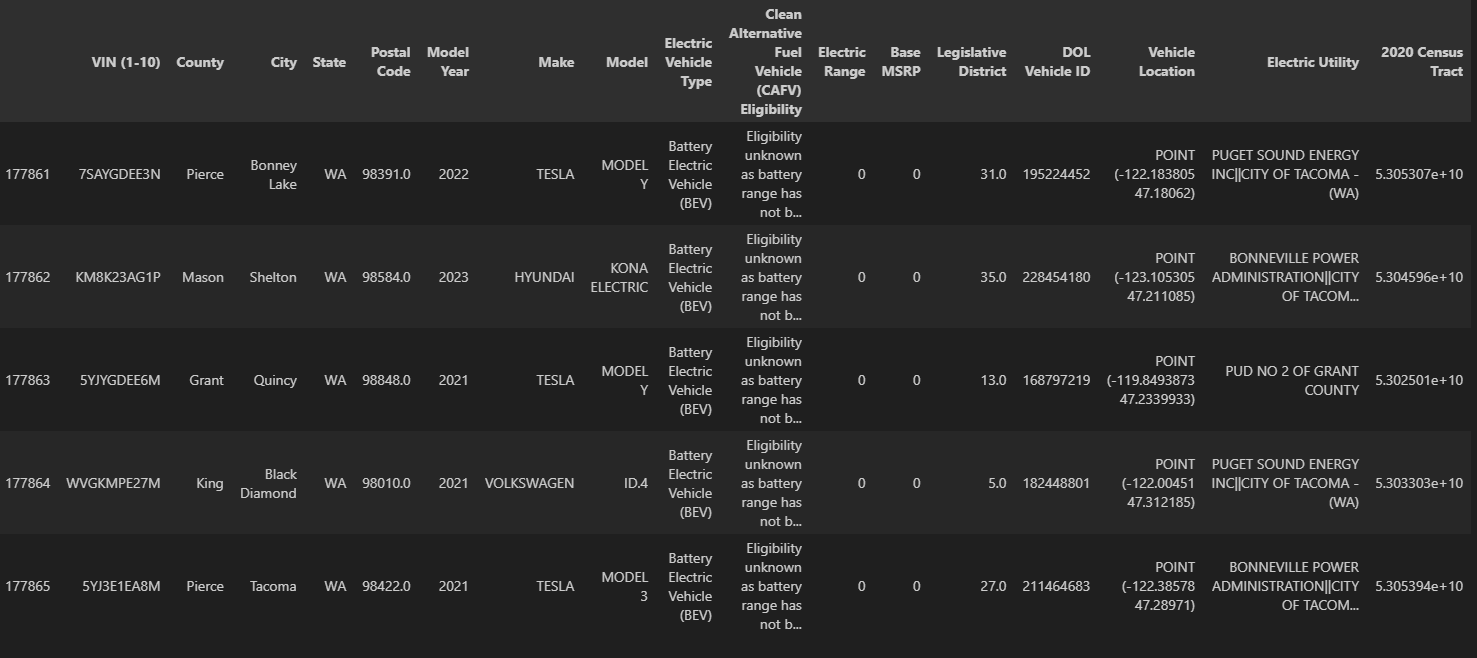

### 3- Check the shape of dataset.

(177866, 17)

### 4- Check the datatypes of each feature.


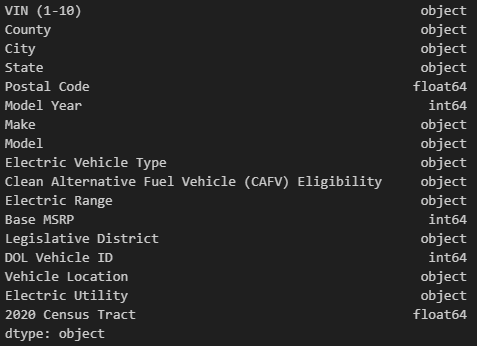

### 5- Check the Statistical summary


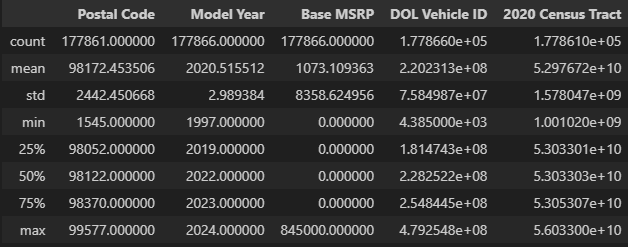

### Observation:
* Base MSRP should not contain 0 as its minimum so it may contain wrong entries
* postal code and dol vehicle id are categorical columns
* 
* 

### 6- Check the null values


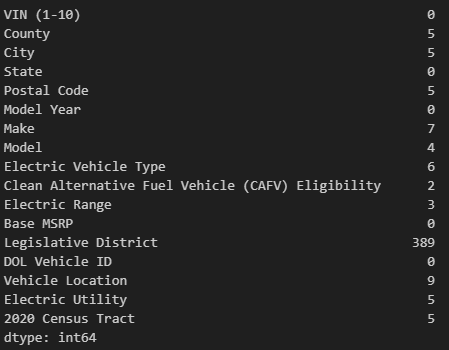

### Observation:
* max number of null values are present in legislative district

### 7- Check the duplicate values


0

### Observation:
* no duplicate values present 

### 8- Check the outliers and their authenticity.


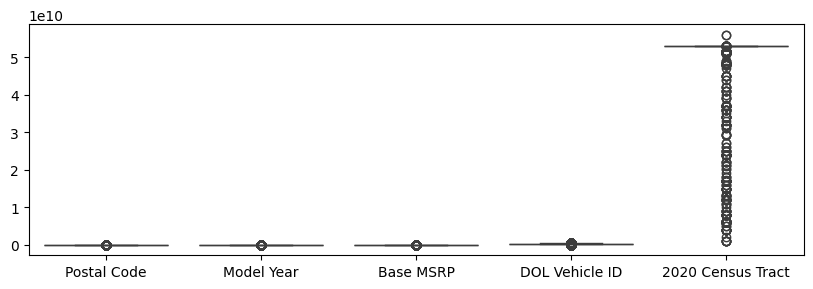

### Observation:
* 2020 Census Tract contain max number of outliers

### 9- Check the anomalies or wrong entries.
* as we know that the datatype of electric range is object so it may contain string.
* the values in Base MSRP seems to be wrong entry 

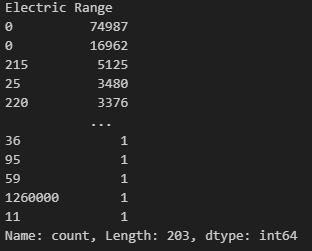

### Observation:
* still did'nt got any string. so now we'll try to find the string by using error

## Observation:
* Electric range column was having "? " that's whyy its data type was object
* and same goes for Legislative District

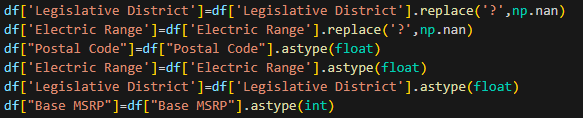

### Observation:
* replaced ? from both columns
* chnaged the data type of postal code to int
* as msrp is a usefull column so have the best way is to analyse the columns that are filled or havingdata other than 0

## Observation:
* stored the data where the valid value of msrp is present as it is one of the usefull column and we can move forward with this column only

* observed dtaframe where there arevalid valued of msrp
* shape: (3344,17)

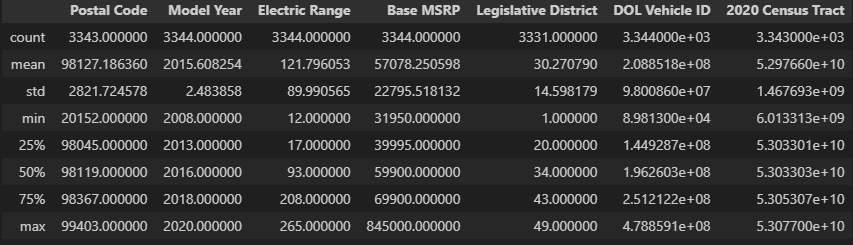

* observing stastical summary of new dataframe

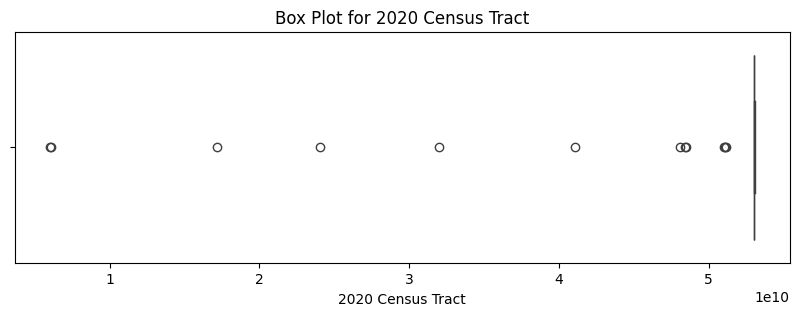

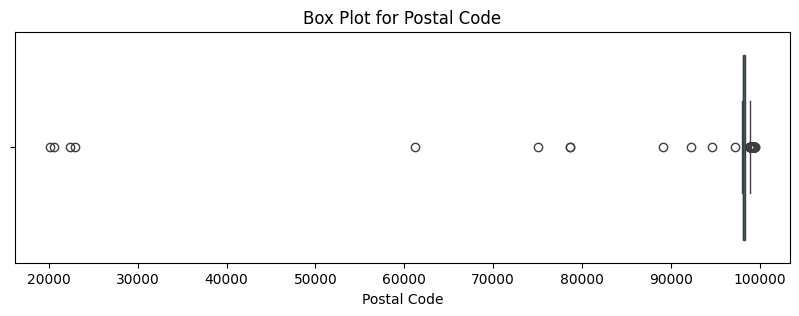

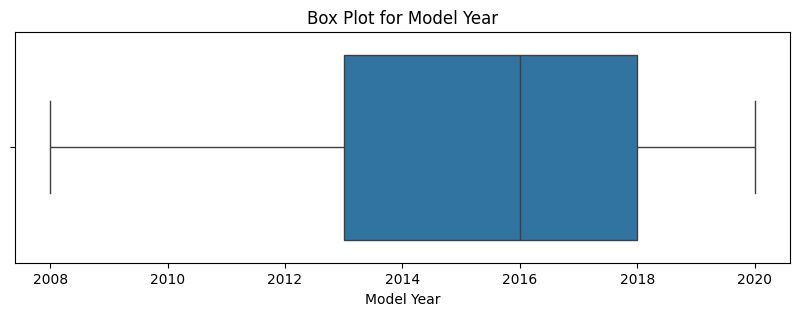

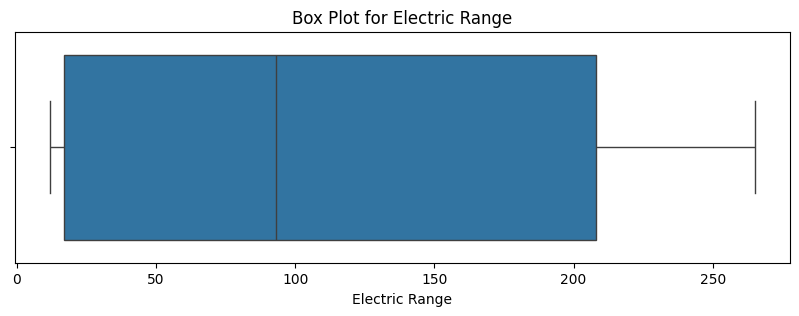

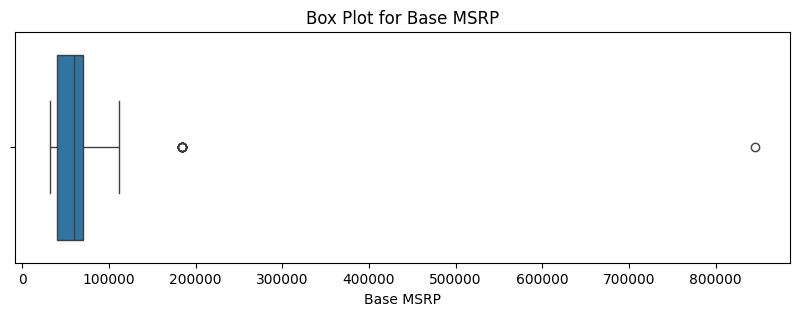

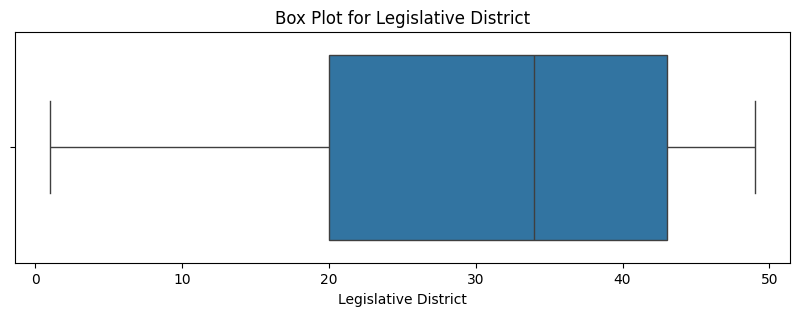

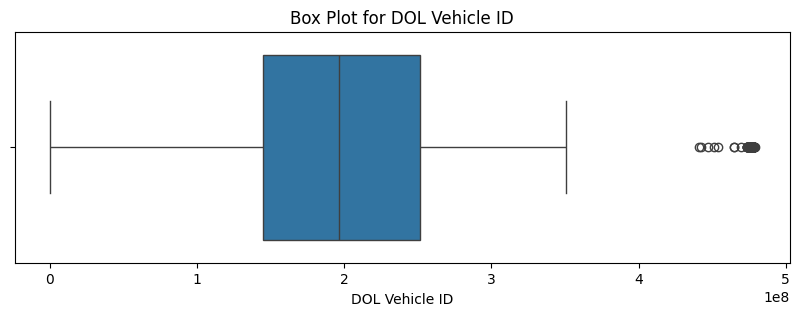

* boxplot of new df 

### 10- Do the necessary data cleaning steps like dropping duplicates, unnecessary columns, null value imputation, outliers treatment etc.


#### Droping Duplicates:
* no duplicates there in data

### Outliers treatement:


* outliers are treated

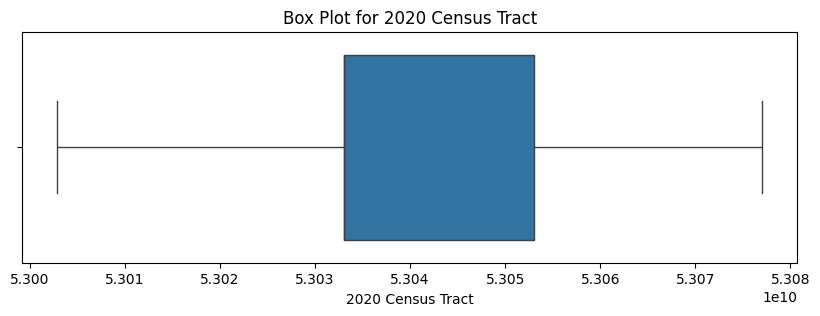

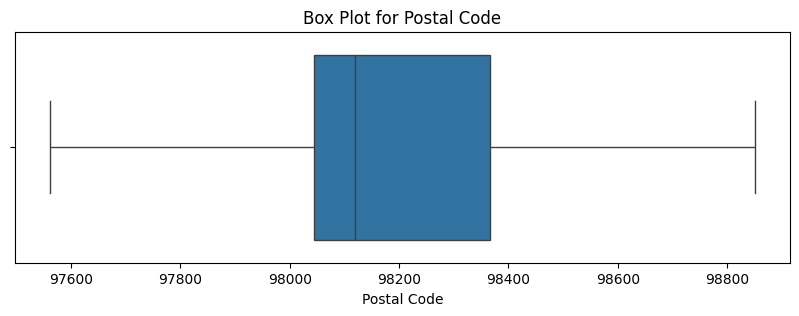

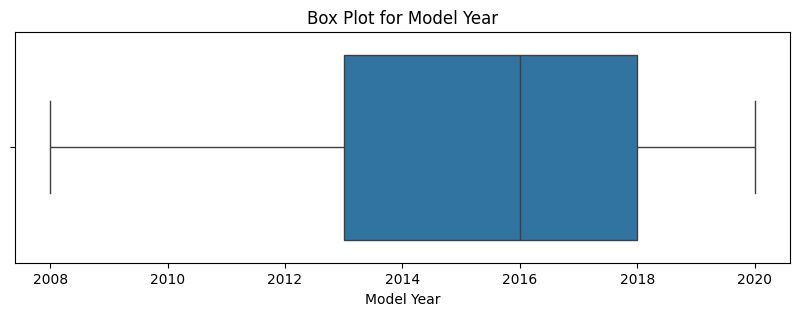

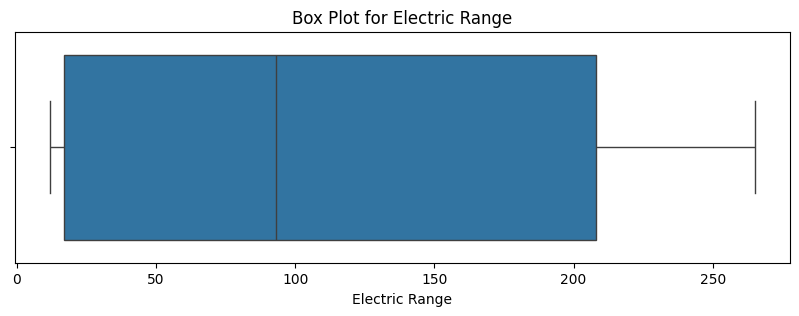

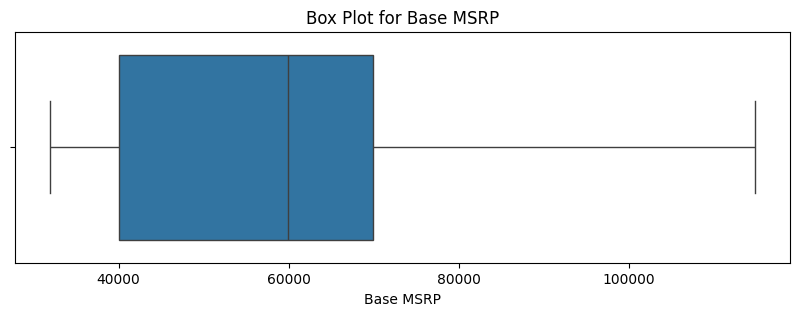

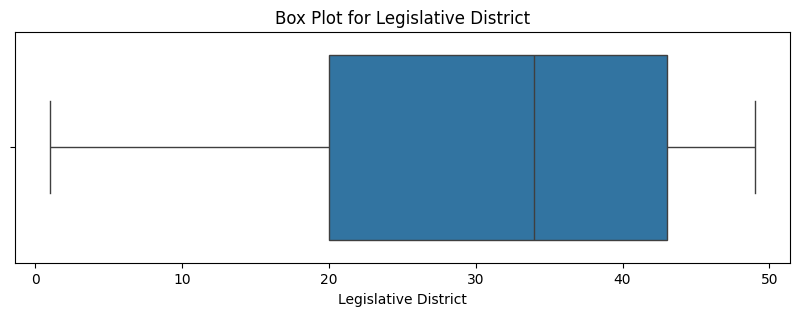

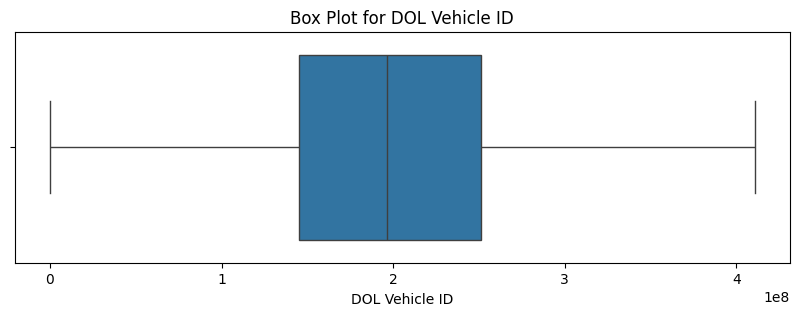

* boxplots after outlier treatement

### Null value imputation:


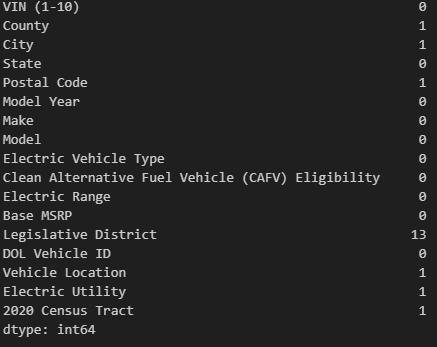

* null values in new df

* replaced the null values with mean and mode values 

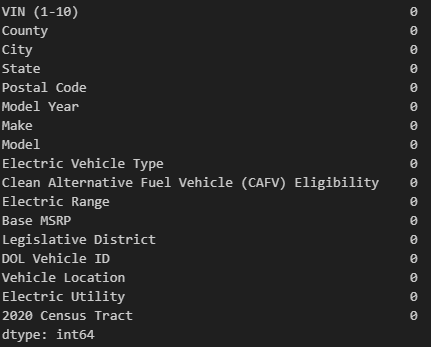

* null values are removed 

# 1.	Descriptive Statistics:
* What are the mean, median, and standard deviation of the base MSRP for the vehicles in the dataset?

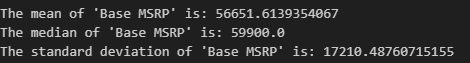

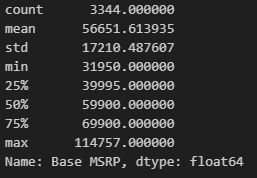

# 2.	Data Distribution:
*	What is the distribution of vehicle makes in the dataset? Represent it using a bar chart.


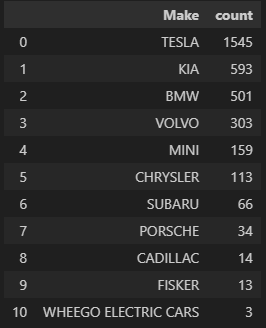

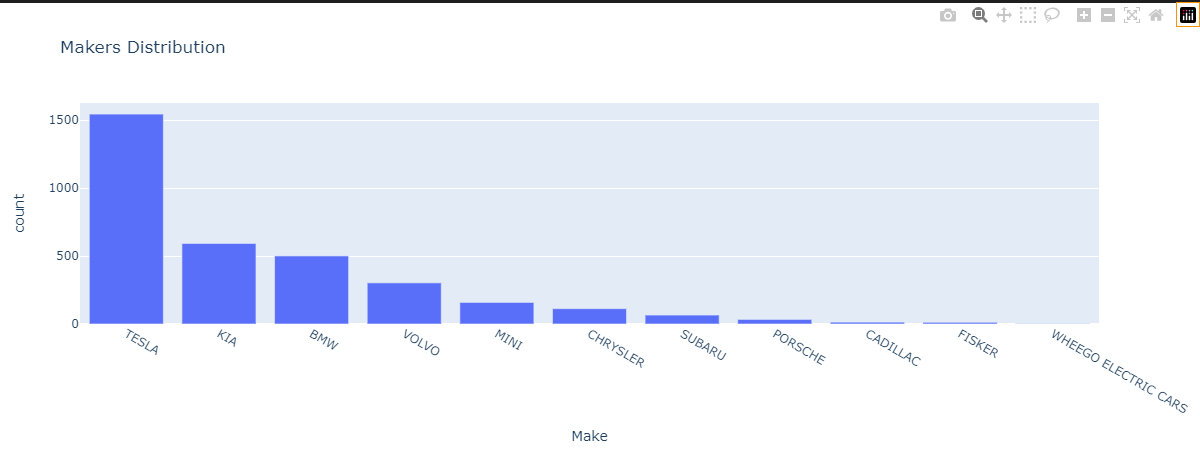

# 3.	Model Year Analysis:
*	What are the most common model years in the dataset? Provide a frequency table and histogram.


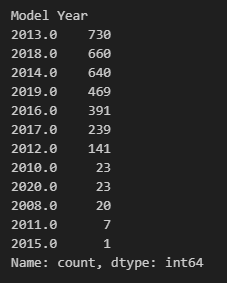

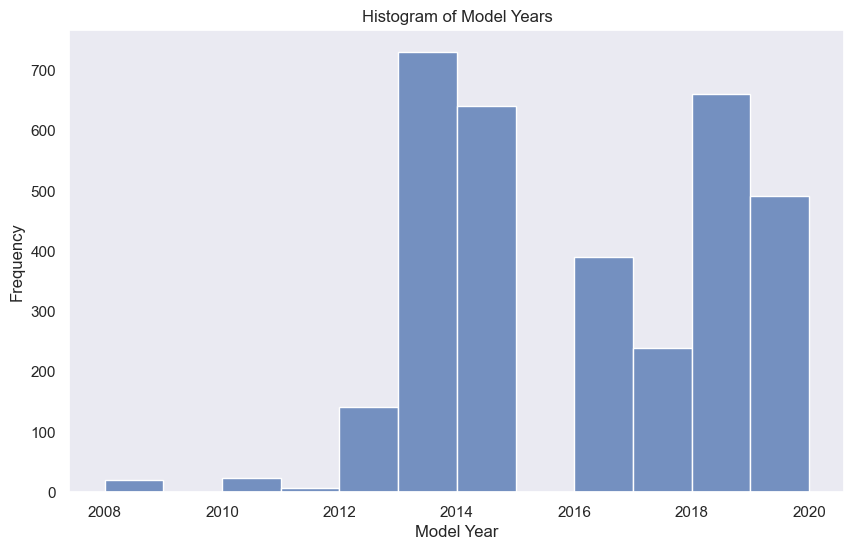

# 4.	Electric Vehicle Type:
*	What is the proportion of Battery Electric Vehicles (BEV) versus other types of electric vehicles?


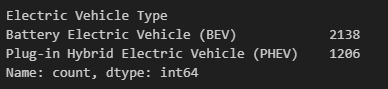

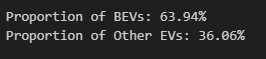

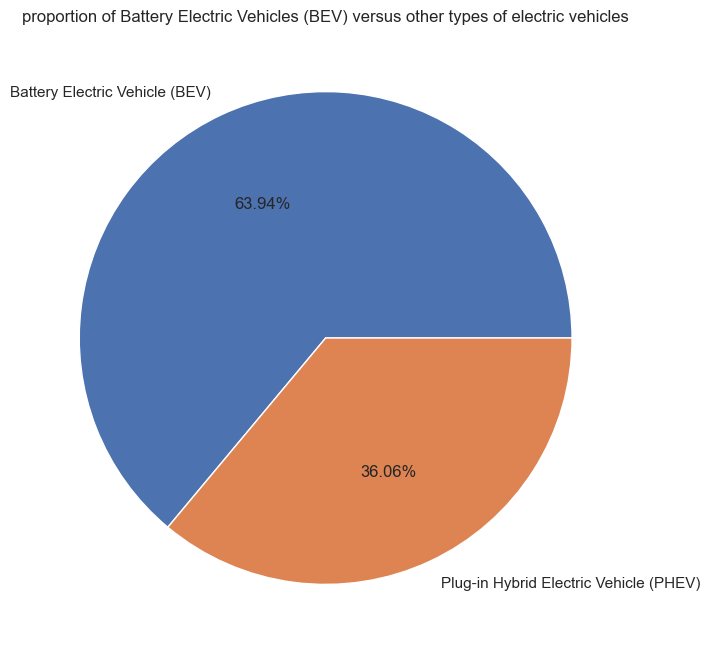

# 5.	Electric Range Analysis:
*	What is the average electric range for vehicles of different makes? Provide a summary table.


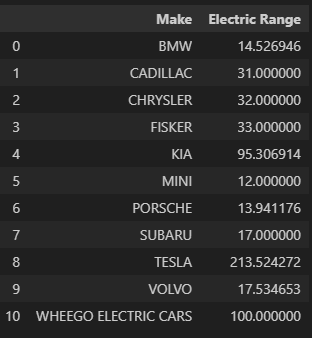

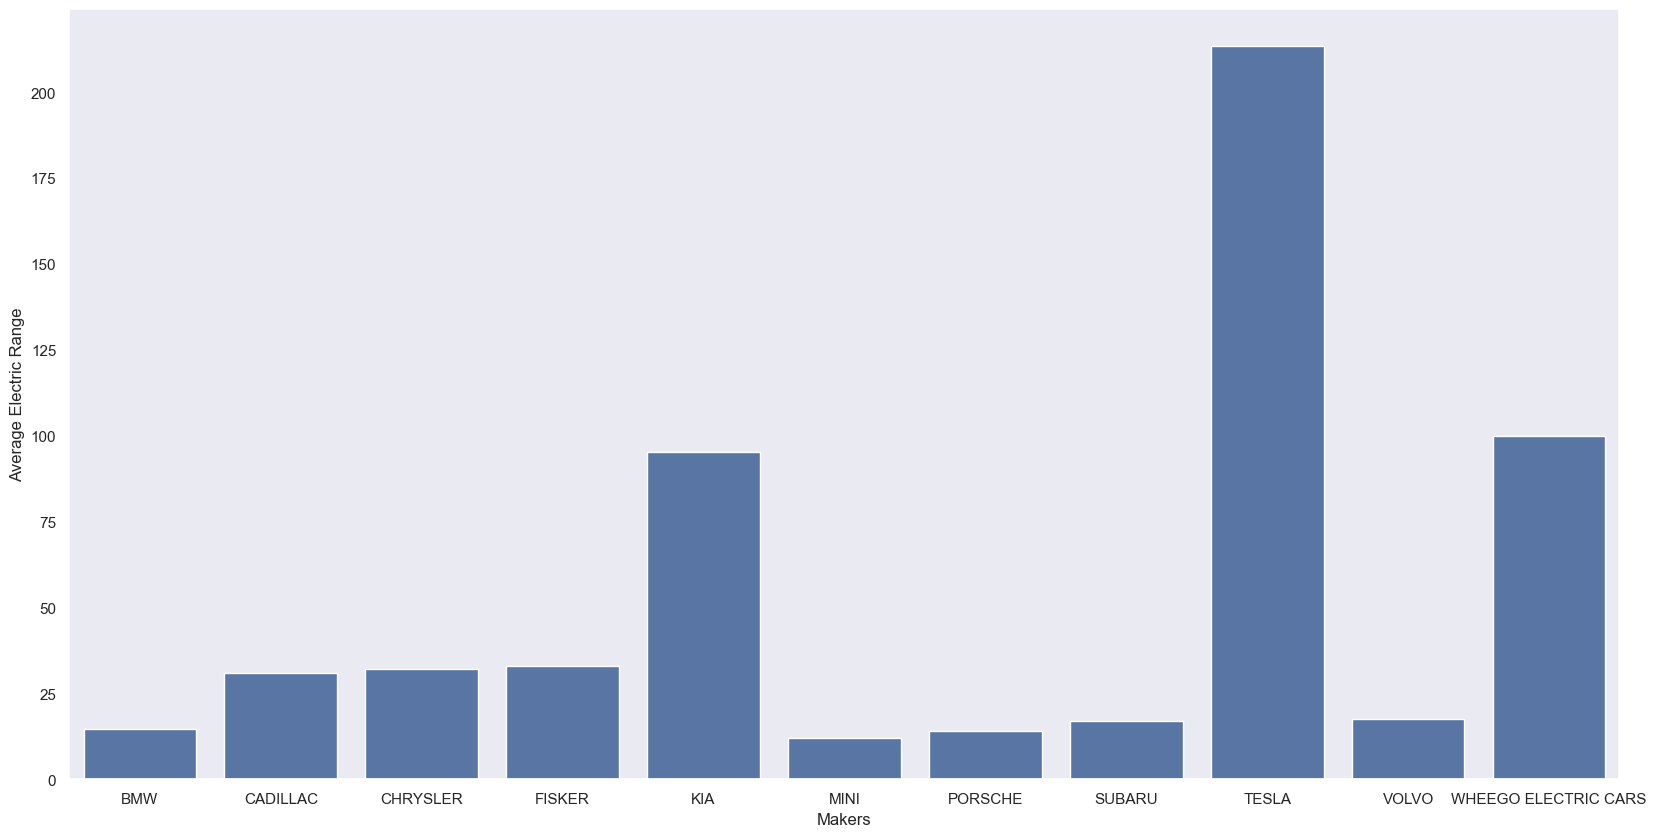

# 6.	County Distribution:
*	How are vehicles distributed across different counties in Washington state? Represent the distribution using a pie chart.


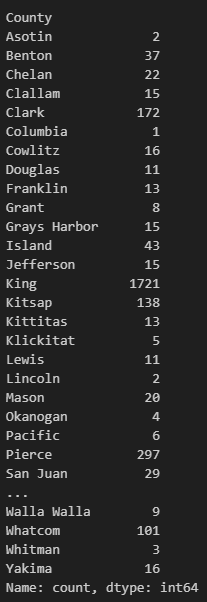

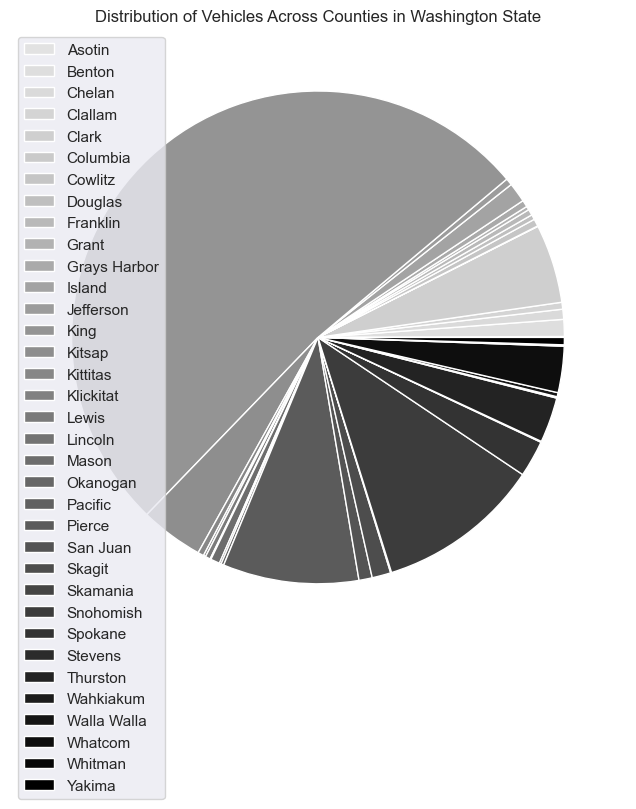

# 7.	Price Analysis:
*	Compare the average base MSRP of vehicles eligible for the Clean Alternative Fuel Vehicle (CAFV) program versus those that are not.


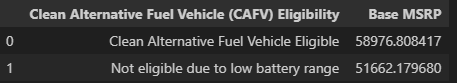

# 8.	Geographical Analysis:
*	How does the base MSRP vary across different cities in Washington state?


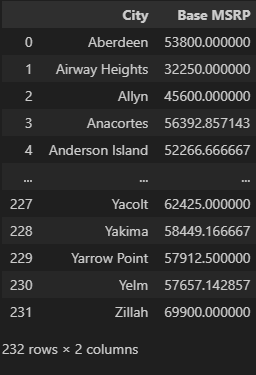

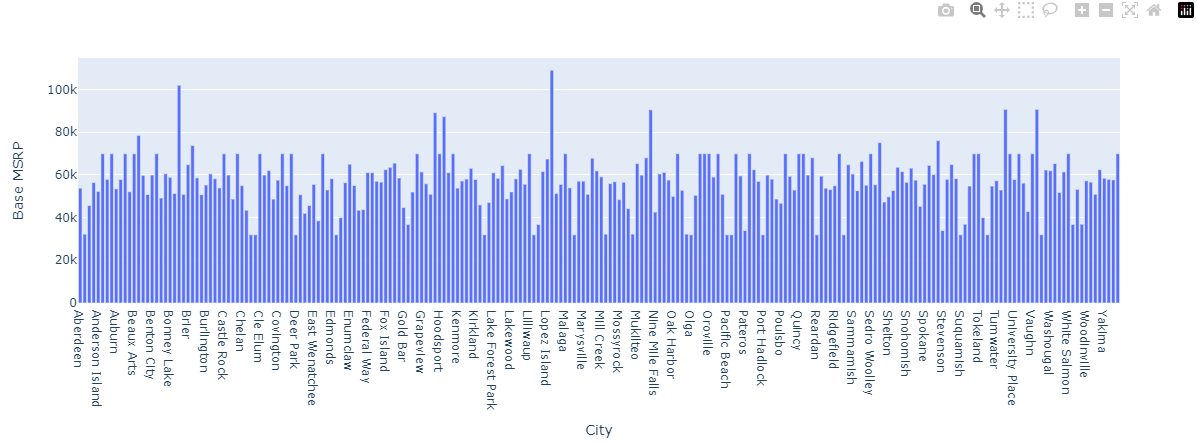

# 9.	Legislative Districts:
*	Which legislative districts have the highest number of registered electric vehicles? Provide a ranked list.


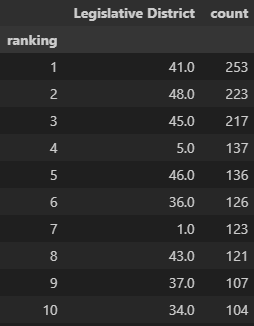

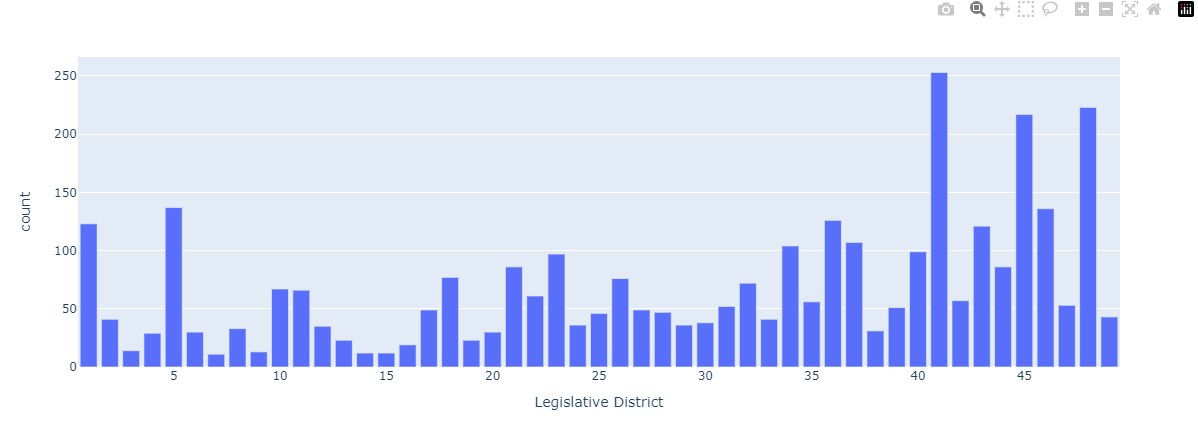

# 10.	Electric Utility Providers:
*	What is the distribution of electric utility service providers for the vehicles in the dataset?


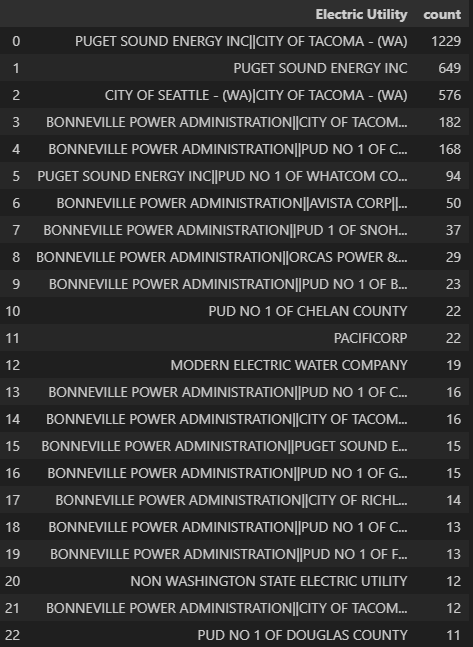

# 11.	Census Tract Analysis:
*	How are vehicles distributed across different 2020 Census Tracts? Provide insights based on vehicle counts per tract.


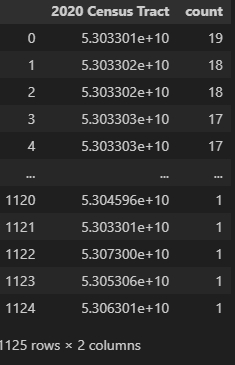

# 12.	Electric Range Correlation:
*	Is there a correlation between the electric range and the base MSRP of the vehicles? Provide the correlation coefficient and interpret the result.


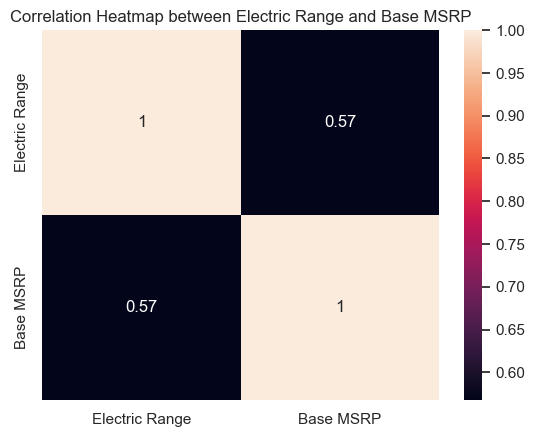

# Observation:
* A correlation coefficient of 0.57 indicates a moderate positive linear relationship between electric range and base MSRP, suggesting that as electric range increases, base MSRP tends to increase as well, but not perfectly.

# 13.	VIN Analysis:
*	Identify any patterns or commonalities in the VIN (1-10) for the vehicles. Are there any frequent prefixes or suffixes?


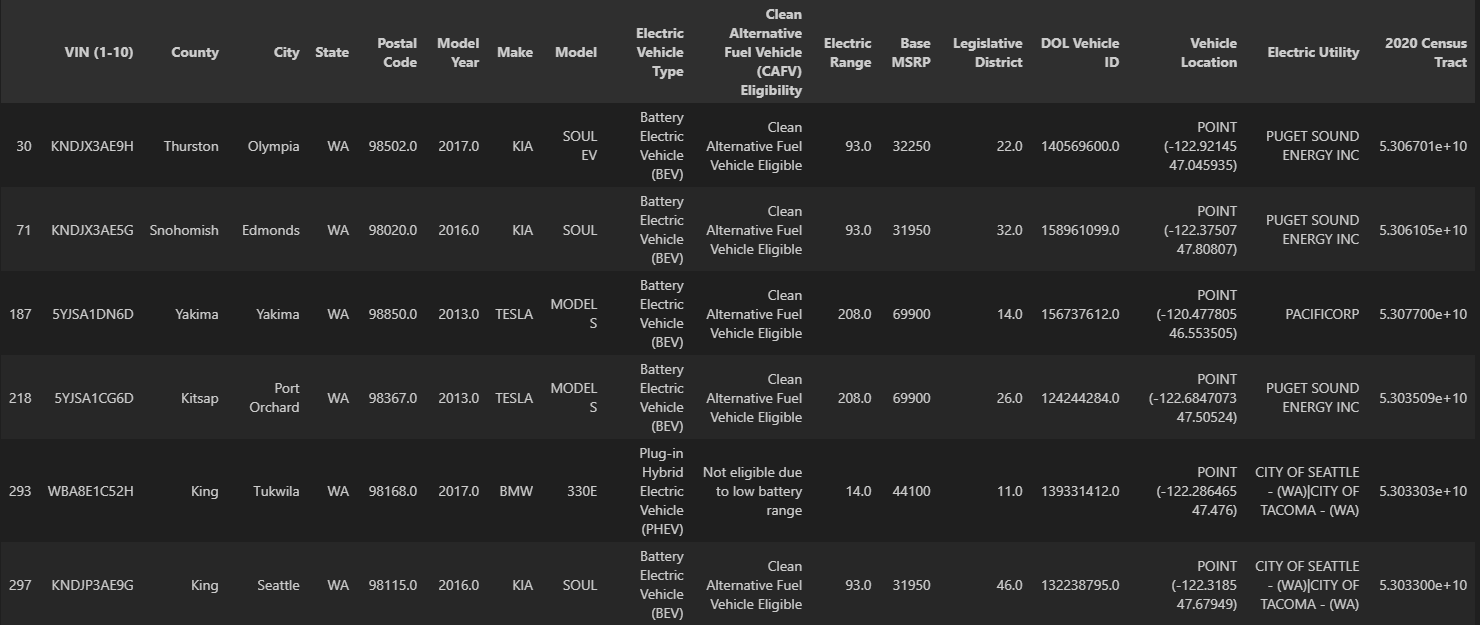

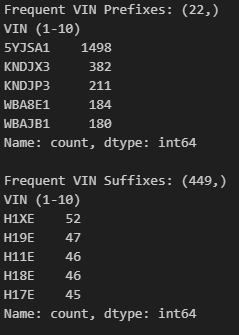

# 14.	Eligibility Status:
*	What percentage of vehicles are eligible for the Clean Alternative Fuel Vehicle (CAFV) program?


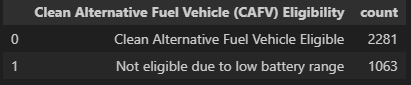

Percentage of vehicle eligible for clean alternative fuel vehicle(CAFV) program: 68.21172248803828

# 15.	Model Popularity:
*	Which vehicle models are the most popular in the dataset? Provide a frequency table of the top 10 models.


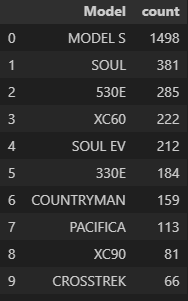

# 16.	Postal Code Distribution:
*	How are vehicles distributed across different postal codes? Provide a heatmap or density plot.


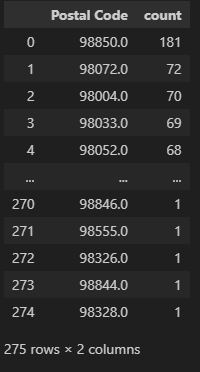

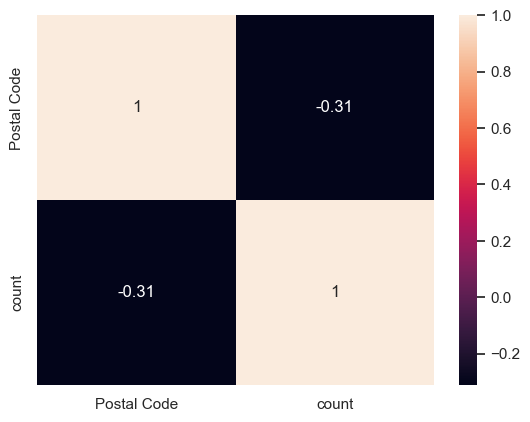

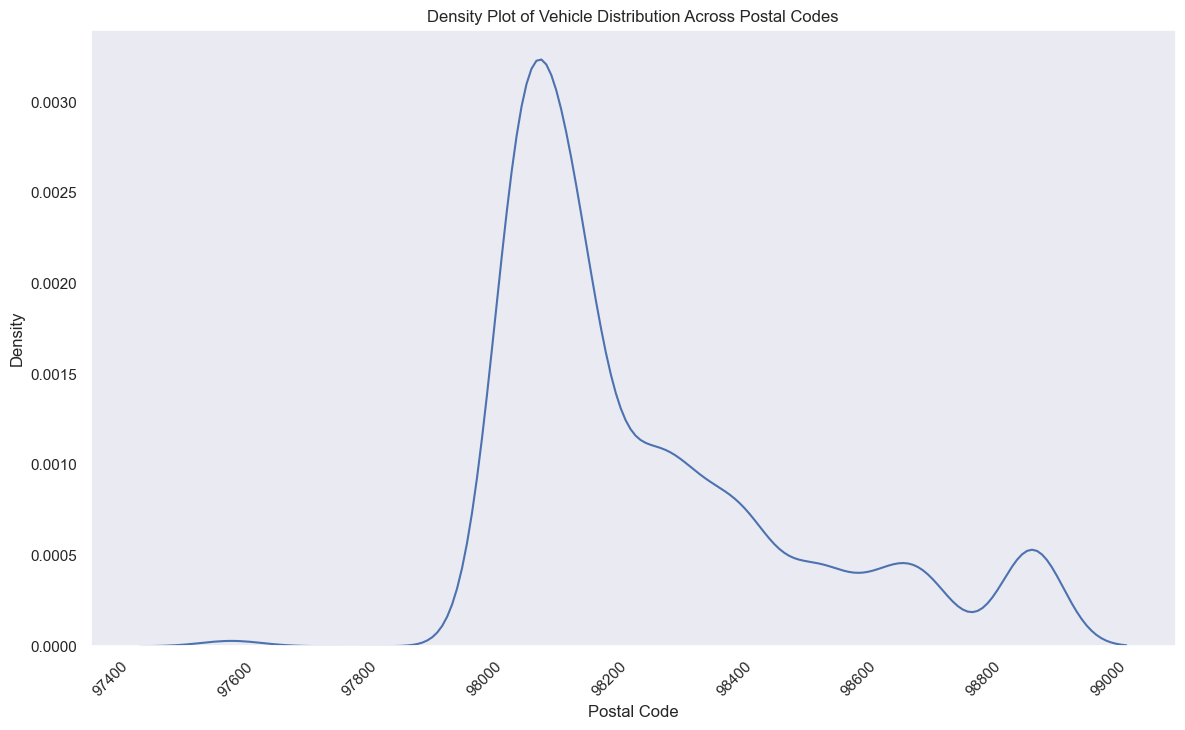

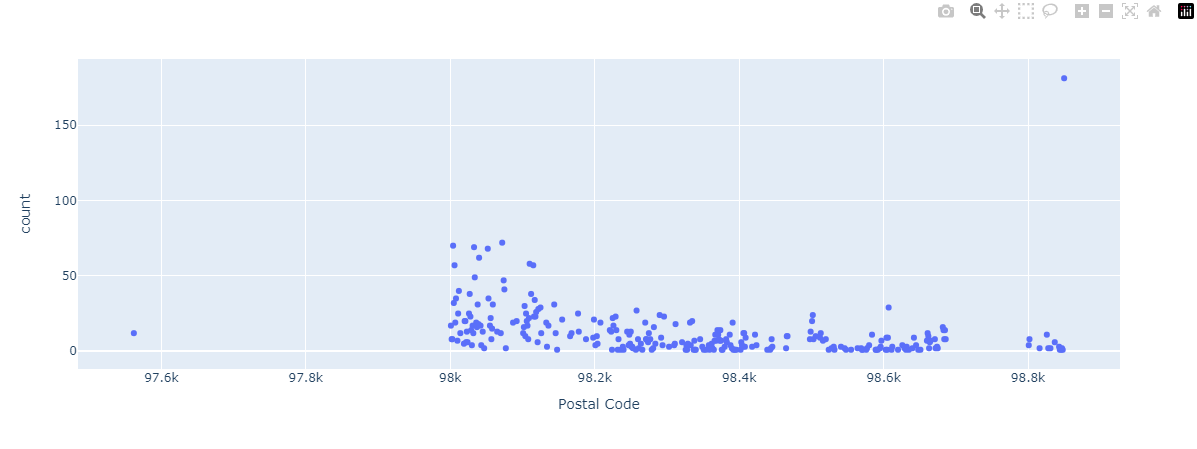

# 17.	Vehicle Location Analysis:
*	Analyze the geographic coordinates to determine any clusters of electric vehicles in certain areas of Washington state.


In [ ]:
df1.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
30,KNDJX3AE9H,Thurston,Olympia,WA,98502.0,2017.0,KIA,SOUL EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,32250,22.0,140569600.0,POINT (-122.92145 47.045935),PUGET SOUND ENERGY INC,5.306701e+10
71,KNDJX3AE5G,Snohomish,Edmonds,WA,98020.0,2016.0,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950,32.0,158961099.0,POINT (-122.37507 47.80807),PUGET SOUND ENERGY INC,5.306105e+10
187,5YJSA1DN6D,Yakima,Yakima,WA,98850.0,2013.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900,14.0,156737612.0,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
218,5YJSA1CG6D,Kitsap,Port Orchard,WA,98367.0,2013.0,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900,26.0,124244284.0,POINT (-122.6847073 47.50524),PUGET SOUND ENERGY INC,5.303509e+10
293,WBA8E1C52H,King,Tukwila,WA,98168.0,2017.0,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14.0,44100,11.0,139331412.0,POINT (-122.286465 47.476),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303303e+10


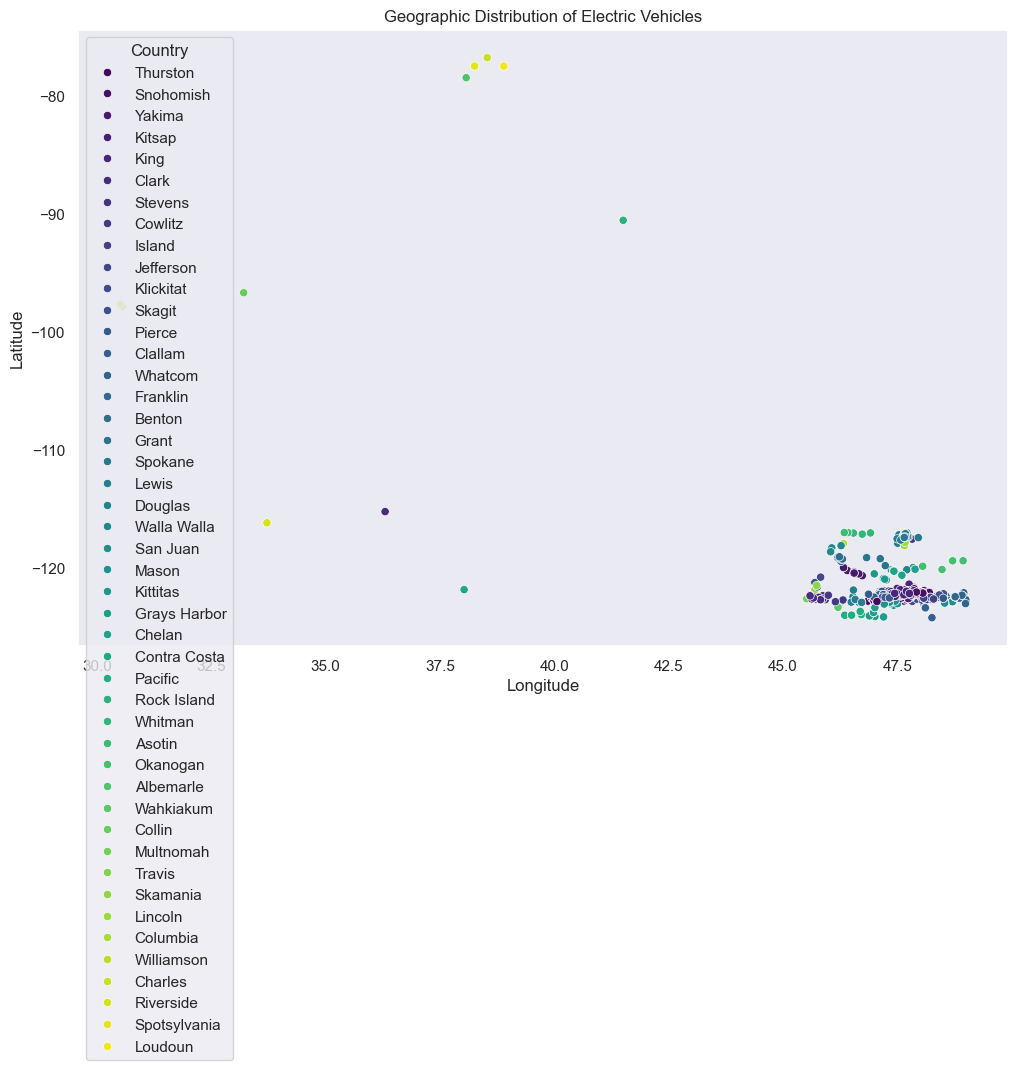

## Observation:
* we can see a cluster in ((-128 to -115),(45,48))

# 18.	Model Year Trend:
*	Analyze the trend in the number of registered electric vehicles by model year. Provide a line chart to show any increase or decrease over the years.


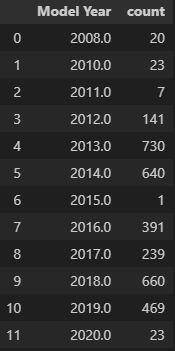

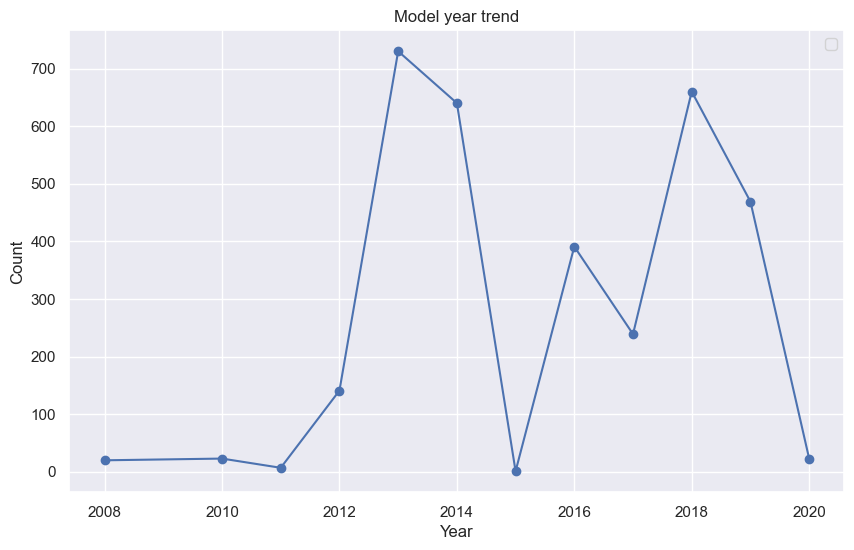

# 19.	Range vs. Year:
*	Is there a trend between the model year and the electric range of the vehicles? Provide a scatter plot and analyze the trend.


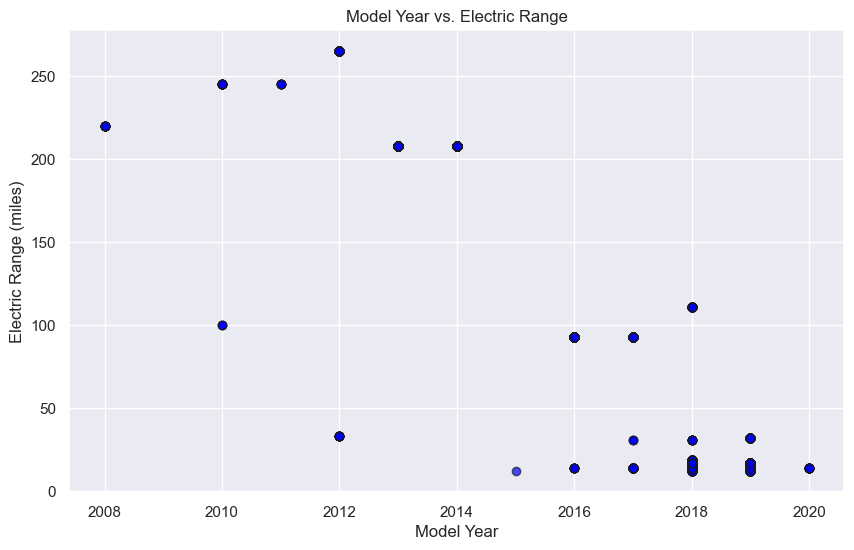

# 20.	Legislative District and MSRP:
*	How does the average base MSRP vary across different legislative districts?



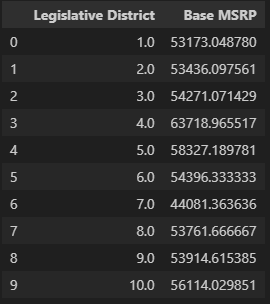